## Лабораторная работа
Решите пожалуйста следующие задачи.
1. Рассчитайте метрики TF-IDF для любых 10 песен на одном языке,
которые вы сами выберите. Не забудьте, что нужно привести слова к начальной форме, убрать стоп-слова.
2.Цель этого задания - использовать предварительно обученную модель BERT для классификации тональности отзывов на фильмы. - Скачайте датасет отзывов на фильмы. Датасет содержит текст отзыва и бинарную метку тональности (положительный / отрицательный).
- Используйте библиотеку Hugging Face для загрузки предварительно обученной модели BERT и токенизатора.
-Подготовьте данные: используйте токенизатор BERT для преобразования текстовых данных в формат, который можно подать на вход модели BERT.
-Создайте классификатор на основе BERT: это может быть модель BERT с одним линейным слоем для классификации на вершине.
-Обучите классификатор на данных обучения и оцените его производительность на данных для тестирования.


###1. Рассчитайте метрики TF-IDF для любых 10 песен на одном языке, которые вы сами выберите. Не забудьте, что нужно привести слова к начальной форме, убрать стоп-слова.


In [5]:
pip install scikit-learn

     ---------------------------------------- 9.3/9.3 MB 5.3 MB/s eta 0:00:00
     ---------------------------------------- 44.1/44.1 MB 4.0 MB/s eta 0:00:00
  Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\IRGil\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [13]:
import os # работа с папкой и файлами
import re # регулярные выражения, доп вариант к очистке

import nltk # работа с пакетами языков
from nltk import word_tokenize, ngrams # токенизация и деление на n граммы
from wordcloud import WordCloud # визуальное отображение
from nltk.corpus import stopwords # стопслова, extend
nltk.download("stopwords")
nltk.download('punkt')
import pymorphy2 # работа с русским языком, pymorphy3
import string # работа со строкой
import pandas as pd # работа с таблицей dataframe
import matplotlib.pyplot as plt # визуальное отображение

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IRGil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\IRGil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
with open(r'C:\Users\IRGil\OneDrive\Документы\innopolis\data\Калинка малинка.txt') as f:
    print(f.read)

<built-in method read of _io.TextIOWrapper object at 0x000002221C775560>


In [2]:
COMMON_DIR = "c:/Users/IRGil/OneDrive/Документы/innopolis/data"

def read_song(filename):
    #Функция чтения файла
    text = ''
    with open(f'{COMMON_DIR}/{filename}.txt', 'r', encoding='utf-8') as f:
        text = f.read()
        text = text.replace('\n', ' ')
    return text

In [3]:
texts = []

direct_list = os.listdir(COMMON_DIR) # файлы в папке
print(direct_list)

# имена песен
names = [song.replace(".txt", "") for song in direct_list]
print(names)

['Калинка малинка.txt', 'Когда мы были на войне.txt', 'На поле танки грохотали.txt', 'Напилася я пьяна.txt', 'Окрасился месяц баргянцем.txt', 'Смуглянка.txt', 'У церкви стояла карета.txt', 'Черный ворон.txt', 'Что стоишь, качаясь.txt', 'Шумел камыш.txt']
['Калинка малинка', 'Когда мы были на войне', 'На поле танки грохотали', 'Напилася я пьяна', 'Окрасился месяц баргянцем', 'Смуглянка', 'У церкви стояла карета', 'Черный ворон', 'Что стоишь, качаясь', 'Шумел камыш']


In [13]:
songs_list = []
for song in names:
    songs_list.append(read_song(song)) #чтение данных

songs_list

['Калинка, калинка, калинка моя! В саду ягода малинка, малинка моя!  Ах! Под сосною под зеленою Спать положите вы меня; Ай, люли, люли, ай, люли, люли, Спать положите вы меня.  Калинка, калинка, калинка моя! В саду ягода малинка, малинка моя!  Ах! Сосенушка ты зеленая, Не шуми же надо мной! Ай, люли, люли, ай, люли, люли, Не шуми же надо мной!  Калинка, калинка, калинка моя! В саду ягода малинка, малинка моя! Ах! Красавица, душа-девица, Полюби же ты меня!  Ай, люли, люли, ай, люли, люли, Полюби же ты меня!  Калинка, калинка, калинка моя! В саду ягода малинка, малинка моя!',
 'Когда мы были на войне, Когда мы были на войне, Там каждый думал о своей Любимой али о жене.  И я конечно думать мог, И я конечно думать мог, Когда на трубочку глядел, На голубой её дымок.  Как ты когда-то мне лгала, Как ты когда-то мне лгала, Что сердце девичье своё Навек другому отдала.  Но я не думал ни о чём, Но я не думал ни о чём, Я только трубочку курил С турецким горьким табачком.  Я только верной пули жду

In [14]:
stopwords_list= stopwords.words("russian") #стоп-слова русского языка
len(stopwords_list)

151

In [15]:
extra_stop = ['твоей', 'свои', 'тобой', 'мой', 'люли', 'ай', 'ах', 'али', 'ка', 'чём', 'её', 'б', ]
stopwords_list.extend(extra_stop)


In [16]:
extra_stop = ['твой', 'мой', 'это']
stopwords_list.extend(extra_stop)

In [17]:
len(stopwords_list)

166

In [18]:
def clean_string(text):
    #Функция очищения строк
    string.punctuation += '—'

    text = re.split(' |:|\.|\(|\)|,|"|;|/|\n|\t|-|\?|\[|\]|!', text)
    text = ' '.join([word for word in text if word not in string.punctuation])
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stopwords_list])
    return text

In [19]:
songs_list_сlean = [clean_string(song) for song in songs_list]
songs_list_сlean

['калинка калинка калинка саду ягода малинка малинка сосною зеленою спать положите спать положите калинка калинка калинка саду ягода малинка малинка сосенушка зеленая шуми мной шуми мной калинка калинка калинка саду ягода малинка малинка красавица душа девица полюби полюби калинка калинка калинка саду ягода малинка малинка',
 'войне войне каждый думал своей любимой жене думать мог думать мог трубочку глядел голубой дымок лгала лгала сердце девичье своё навек другому отдала думал думал трубочку курил турецким горьким табачком верной пули жду верной пули жду утолит печаль мою пресечёт нашу вражду будем войне будем войне навстречу пулям полечу вороном своём коне войне войне каждый думал своей любимой жене смерть видно смерть снова конь вороной выносит огня',
 'поле танки грохотали солдаты шли последний бой молодого командира несли пробитой головой танк ударила болванка прощай гвардейский экипаж четыре трупа возле танка дополнят утренний пейзаж машина пламенем объята рванет боекомплект жит

In [20]:
morph = pymorphy2.MorphAnalyzer()

def normilize_word(text):
    # привести слова к начальной форме
    words = text.split() # по пробелу разделить
    result_list = []
    for word in words:
        # print(morph.parse(word))
        normal_form = morph.parse(word)[0].normal_form
        result_list.append(normal_form)
        print(normal_form)
    return " ".join(result_list)


In [21]:
songs_list_norm = [normilize_word(song) for song in songs_list_сlean]
songs_list_norm

калинка
калинка
калинка
сад
ягода
малинка
малинка
сосна
зелёный
спать
положить
спать
положить
калинка
калинка
калинка
сад
ягода
малинка
малинка
сосенушко
зелёный
шуметь
я
шуметь
я
калинка
калинка
калинка
сад
ягода
малинка
малинка
красавица
душа
девица
полюбить
полюбить
калинка
калинка
калинка
сад
ягода
малинка
малинка
война
война
каждый
думать
свой
любимый
жена
думать
мочь
думать
мочь
трубочка
глядеть
голубой
дымка
лгать
лгать
сердце
девичий
свой
навек
другой
отдать
думать
думать
трубочка
курить
турецкий
горький
табачок
верный
пуля
ждать
верный
пуля
ждать
утолить
печаль
мой
пресечь
наш
вражда
быть
война
быть
война
навстречу
пуля
полечить
ворон
свой
конь
война
война
каждый
думать
свой
любимый
жена
смерть
видно
смерть
снова
конь
ворона
выносить
огонь
поле
танк
грохотать
солдат
идти
последний
бой
молодой
командир
нести
пробить
голова
танк
ударить
болванка
прощать
гвардейский
экипаж
четыре
труп
возле
танк
дополнить
утренний
пейзаж
машина
пламя
объять
рвануть
боекомплект
жить
хотеться
ребят

['калинка калинка калинка сад ягода малинка малинка сосна зелёный спать положить спать положить калинка калинка калинка сад ягода малинка малинка сосенушко зелёный шуметь я шуметь я калинка калинка калинка сад ягода малинка малинка красавица душа девица полюбить полюбить калинка калинка калинка сад ягода малинка малинка',
 'война война каждый думать свой любимый жена думать мочь думать мочь трубочка глядеть голубой дымка лгать лгать сердце девичий свой навек другой отдать думать думать трубочка курить турецкий горький табачок верный пуля ждать верный пуля ждать утолить печаль мой пресечь наш вражда быть война быть война навстречу пуля полечить ворон свой конь война война каждый думать свой любимый жена смерть видно смерть снова конь ворона выносить огонь',
 'поле танк грохотать солдат идти последний бой молодой командир нести пробить голова танк ударить болванка прощать гвардейский экипаж четыре труп возле танк дополнить утренний пейзаж машина пламя объять рвануть боекомплект жить хоте

In [22]:
df = []
df = pd.DataFrame({'name': names, 'song_text': songs_list_norm})

In [23]:
df.head()

,name,song_text
0,Калинка малинка,калинка калинка калинка сад ягода малинка мали...
1,Когда мы были на войне,война война каждый думать свой любимый жена ду...
2,На поле танки грохотали,поле танк грохотать солдат идти последний бой ...
3,Напилася я пьяна,напилася пьяный дойти дом довести тропка дальн...
4,Окрасился месяц баргянцем,окраситься месяц багрянец волна бушевать скала...


In [24]:
plt.rcParams["figure.figsize"] = (10,5) # размер графиков

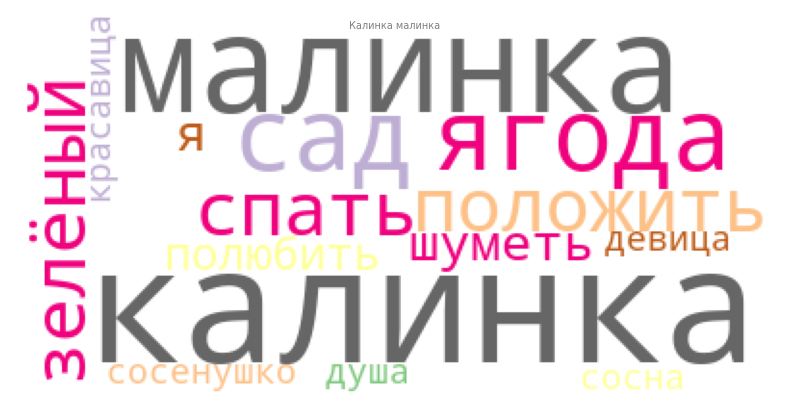

In [33]:
# TODO вынести в def
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.subplots_adjust(wspace=0.3, hspace=0.2)

i = 1
for name, text in zip(df.name, df.song_text):
    tokens = word_tokenize(df['song_text'][0])
    text_raw = " ".join(tokens)
    wordcloud = WordCloud(colormap='Accent', background_color='white', contour_width=10).generate(text_raw)
    plt.tick_params(labelsize=10)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(df['name'][0],fontdict={'fontsize':7,'color':'grey'},y=0.93)
    plt.tick_params(labelsize=10)
    i += 1

In [26]:
'''
frequencies, 
font_sizes, 
positions,
orientations, colors
'''
wordcloud.layout_

[(('калинка', 1.0), 84, (96, 12), None, 'rgb(190, 174, 212)'),
 (('малинка', 0.6666666666666666), 70, (45, 31), None, 'rgb(240, 2, 127)'),
 (('сад', 0.3333333333333333), 52, (153, 176), None, 'rgb(240, 2, 127)'),
 (('ягода', 0.3333333333333333), 52, (3, 239), None, 'rgb(127, 201, 127)'),
 (('зелёный', 0.16666666666666666), 39, (164, 4), None, 'rgb(102, 102, 102)'),
 (('спать', 0.16666666666666666), 39, (22, 41), None, 'rgb(190, 174, 212)'),
 (('положить', 0.16666666666666666), 36, (1, 38), None, 'rgb(255, 255, 153)'),
 (('шуметь', 0.16666666666666666), 36, (143, 264), None, 'rgb(190, 174, 212)'),
 (('я', 0.16666666666666666), 36, (78, 354), 2, 'rgb(191, 91, 23)'),
 (('полюбить', 0.16666666666666666),
  27,
  (175, 267),
  None,
  'rgb(102, 102, 102)'),
 (('сосна', 0.08333333333333333), 20, (29, 177), None, 'rgb(102, 102, 102)'),
 (('сосенушко', 0.08333333333333333), 20, (143, 20), None, 'rgb(240, 2, 127)'),
 (('красавица', 0.08333333333333333), 20, (33, 381), 2, 'rgb(240, 2, 127)'),
 (

In [27]:
# Создание объекта TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Применение TF-IDF к текстовым данным
tfidf_matrix = tfidf_vectorizer.fit_transform(songs_list_norm)

# Получение списка ключевых слов и их значения TF-IDF для первого документа
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()[0]

# Сортировка слов по значениям TF-IDF
sorted_keywords = [word for _, word in sorted(zip(tfidf_scores, feature_names), reverse=True)]

print("Ключевые слова:", sorted_keywords)

Ключевые слова: ['калинка', 'малинка', 'ягода', 'сад', 'спать', 'полюбить', 'положить', 'шуметь', 'зелёный', 'сосна', 'сосенушко', 'красавица', 'душа', 'девица', 'экипаж', 'щепка', 'широкий', 'шептаться', 'шальной', 'чёрный', 'чужой', 'чистый', 'четыре', 'челнок', 'чаять', 'часто', 'церковь', 'хотеться', 'хотеть', 'хороший', 'форма', 'утром', 'утро', 'утренний', 'утолить', 'уйти', 'узнать', 'ударить', 'угол', 'увидеть', 'тёмный', 'тын', 'ты', 'турецкий', 'труп', 'трубочка', 'тропка', 'тропинка', 'трава', 'тонкий', 'толпа', 'тих', 'телеграмма', 'танкистский', 'танкист', 'танк', 'такой', 'такая', 'табачок', 'сюда', 'сын', 'счастие', 'судьба', 'стрела', 'стоять', 'сторонка', 'стоить', 'стать', 'старушка', 'среди', 'спросить', 'справиться', 'спасти', 'соседний', 'солдат', 'собираться', 'собирать', 'снова', 'смутить', 'смуглянка', 'смотреть', 'смерть', 'смертельнуть', 'смахнуть', 'слышать', 'слеза', 'скромять', 'склоняться', 'сквозь', 'скала', 'сказать', 'сиротина', 'сила', 'сидеть', 'сесть

In [28]:
feature_names

array(['багрянец', 'башенный', 'беззащитный', 'безумный', 'белый',
       'битва', 'бледнеть', 'бледный', 'бог', 'боекомплект', 'бой',
       'болванка', 'бросаться', 'булатный', 'буря', 'бушевать', 'быть',
       'век', 'венок', 'венчальный', 'венчать', 'вернуться', 'верный',
       'весло', 'весь', 'ветвь', 'взгляни', 'взять', 'видеть', 'видно',
       'виноград', 'виться', 'вишнёвый', 'влюбить', 'возле', 'возлюбить',
       'война', 'волна', 'волнам', 'волновалось', 'волновать', 'воля',
       'вонзить', 'ворон', 'ворона', 'вострый', 'вражда', 'вслед',
       'вставать', 'встречать', 'всё', 'выбираться', 'выйти', 'выносить',
       'высокий', 'гвардейский', 'где', 'гибель', 'глаз', 'глядеть',
       'гнуться', 'говорить', 'голова', 'голубой', 'гореть', 'горький',
       'гость', 'громко', 'грохотать', 'грудь', 'гулять', 'густой',
       'давно', 'дальний', 'дать', 'деваться', 'девица', 'девичий',
       'день', 'дерево', 'добыча', 'доверяться', 'довести', 'дождаться',
       'дойти'

In [29]:
tfidf_scores # TODO добавить в df колонку tf idf за файл общий

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [30]:

count_vectorizer = CountVectorizer()

bow = count_vectorizer.fit_transform(songs_list_norm)
bow.shape

(10, 424)

In [31]:
import operator
vocab_sorted = sorted(count_vectorizer.vocabulary_.items(), key=operator.itemgetter(0))
vocab_sorted

[('багрянец', 0),
 ('башенный', 1),
 ('беззащитный', 2),
 ('безумный', 3),
 ('белый', 4),
 ('битва', 5),
 ('бледнеть', 6),
 ('бледный', 7),
 ('бог', 8),
 ('боекомплект', 9),
 ('бой', 10),
 ('болванка', 11),
 ('бросаться', 12),
 ('булатный', 13),
 ('буря', 14),
 ('бушевать', 15),
 ('быть', 16),
 ('век', 17),
 ('венок', 18),
 ('венчальный', 19),
 ('венчать', 20),
 ('вернуться', 21),
 ('верный', 22),
 ('весло', 23),
 ('весь', 24),
 ('ветвь', 25),
 ('взгляни', 26),
 ('взять', 27),
 ('видеть', 28),
 ('видно', 29),
 ('виноград', 30),
 ('виться', 31),
 ('вишнёвый', 32),
 ('влюбить', 33),
 ('возле', 34),
 ('возлюбить', 35),
 ('война', 36),
 ('волна', 37),
 ('волнам', 38),
 ('волновалось', 39),
 ('волновать', 40),
 ('воля', 41),
 ('вонзить', 42),
 ('ворон', 43),
 ('ворона', 44),
 ('вострый', 45),
 ('вражда', 46),
 ('вслед', 47),
 ('вставать', 48),
 ('встречать', 49),
 ('всё', 50),
 ('выбираться', 51),
 ('выйти', 52),
 ('выносить', 53),
 ('высокий', 54),
 ('гвардейский', 55),
 ('где', 56),
 ('ги

### 2.Цель этого задания - использовать предварительно обученную модель BERT для классификации тональности отзывов на фильмы. - Скачайте датасет отзывов на фильмы. Датасет содержит текст отзыва и бинарную метку тональности (положительный / отрицательный).
- Используйте библиотеку Hugging Face для загрузки предварительно обученной модели BERT и токенизатора.
- Подготовьте данные: используйте токенизатор BERT для преобразования текстовых данных в формат, который можно подать на вход модели BERT.
- Создайте классификатор на основе BERT: это может быть модель BERT с одним линейным слоем для классификации на вершине.
- Обучите классификатор на данных обучения и оцените его производительность на данных для тестирования.

In [35]:
pip install transformers


     ---------------------------------------- 7.9/7.9 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 3.3 MB/s eta 0:00:00
     -------------------------------------- 302.0/302.0 KB 2.7 MB/s eta 0:00:00
     -------------------------------------- 145.3/145.3 KB 4.4 MB/s eta 0:00:00
     -------------------------------------- 277.4/277.4 KB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 62.6/62.6 KB 3.5 MB/s eta 0:00:00
     -------------------------------------- 166.4/166.4 KB 3.3 MB/s eta 0:00:00
     -------------------------------------- 295.0/295.0 KB 3.7 MB/s eta 0:00:00
     -------------------------------------- 158.3/158.3 KB 3.2 MB/s eta 0:00:00
     -------------------------------------- 124.2/124.2 KB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 61.5/61.5 KB 3.2 MB/s eta 0:00:00
     -------------------------------------- 100.3/100.3 KB 2.9 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\IRGil\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [38]:
pip install torch

     -------------------------------------- 192.3/192.3 MB 2.0 MB/s eta 0:00:00
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
     ---------------------------------------- 5.7/5.7 MB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 3.7 MB/s eta 0:00:00
  Using cached MarkupSafe-2.1.3-cp310-cp310-win_amd64.whl (17 kB)
     -------------------------------------- 536.2/536.2 KB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\IRGil\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [40]:
pip install seaborn

     -------------------------------------- 294.6/294.6 KB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\IRGil\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [14]:
import torch
import transformers as bert_trained
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv(f"IMDB Dataset.csv")

In [16]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [17]:
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x=='positive' else 0)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [18]:
df.shape

(50000, 2)

In [19]:
df.describe(include="all")

,review,sentiment
count,50000,50000.000000
unique,49582,NaN
top,Loved today's show!!! It was a variety and not...,NaN
freq,5,NaN
mean,NaN,0.500000
std,NaN,0.500005
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.500000
75%,NaN,1.000000


Text(0.5, 0, 'sentiments')

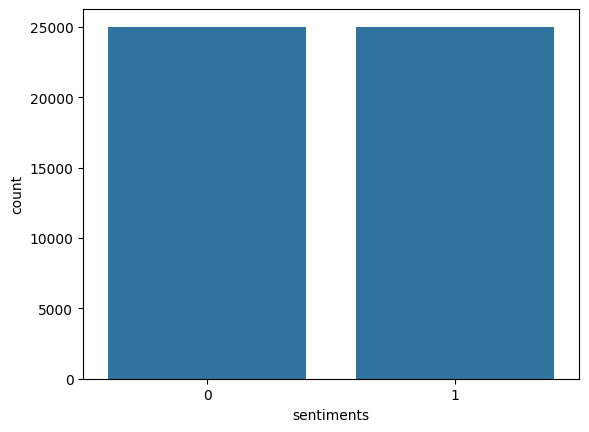

In [20]:
sns.countplot(x=df['sentiment'])
plt.xlabel('sentiments')

In [21]:
# удалим знаки препинания и приведем к нижнему регистру
df['review'] = df['review'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

df

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production br br the filmin...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1
...,...,...
49995,i thought this movie did a down right good job...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,i am a catholic taught in parochial elementary...,0
49998,im going to have to disagree with the previous...,0


In [22]:
# загрузка и удаление стоп-слов
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IRGil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
stop_words.extend(['br']) # добавляет слово в словарь стоп-слов

In [24]:
df.shape

(50000, 2)

### Cтроим bert модель

In [25]:
from transformers import BertTokenizer

In [26]:
PRE_TRAINED_MODEL_NAME = r'bert-base-uncased'

In [27]:
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME, do_lower_case=True)

In [28]:
sample_txt = 'When was I last outside? I am stuck at home for 2 weeks.'

tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f"Предложение: {sample_txt}")
print(f"Токены: {tokens}")
print(f"Идентификаторы токенов: {token_ids}")

max_len = max([len(sent) for sent in tokens])
print('Max length: ', max_len)

Предложение: When was I last outside? I am stuck at home for 2 weeks.
Токены: ['when', 'was', 'i', 'last', 'outside', '?', 'i', 'am', 'stuck', 'at', 'home', 'for', '2', 'weeks', '.']
Идентификаторы токенов: [2043, 2001, 1045, 2197, 2648, 1029, 1045, 2572, 5881, 2012, 2188, 2005, 1016, 3134, 1012]
Max length:  7


In [29]:
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=10,
  truncation=True,
  add_special_tokens=True,
  return_token_type_ids=False,
  padding='longest',
  return_attention_mask=True,
  return_tensors='pt',
)

encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

In [30]:
print(len(encoding['input_ids'][0]))
encoding['input_ids'][0]

10


tensor([ 101, 2043, 2001, 1045, 2197, 2648, 1029, 1045, 2572,  102])

In [31]:
print(len(encoding['attention_mask'][0]))
encoding['attention_mask']

10


tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [32]:
tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])
#[CLS] - непрерывное связывание, sentence-level classification, начало
# [SEP] - разделитель для предложения, конец

['[CLS]', 'when', 'was', 'i', 'last', 'outside', '?', 'i', 'am', '[SEP]']

## IMDB датасет

In [33]:
class IMDBDataset(Dataset):

  def __init__(self, reviews, sentiments, tokenizer, max_len):
    self.reviews = reviews
    self.sentiments = sentiments
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.reviews)
  
  def __getitem__(self, item):
    review = str(self.reviews[item])
    sentiment = self.sentiments[item]

    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'review': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'sentiments': torch.tensor(sentiment, dtype=torch.long)
    }

In [34]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = IMDBDataset(
    reviews=df.review.to_numpy(),
    sentiments=df.sentiment.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

In [35]:
short_df = df[:1000]

In [36]:
short_df.shape

(1000, 2)

In [37]:
RANDOM_SEED = 1234

df_train, df_test = train_test_split(df, test_size=0.1, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

In [38]:
BATCH_SIZE = 16
MAX_LEN = 32

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [39]:
data = next(iter(train_data_loader))
data.keys()

## Классификация отзывов

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [ ]:
class IMDBClassifier(nn.Module):

  def __init__(self, n_classes):
    super(IMDBClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    output = self.drop(pooled_output)
    return self.out(output)

In [ ]:
device = torch.device( 'cuda' if torch.cuda.is_available() else 'cpu' )

NameError: name 'torch' is not defined

In [ ]:
model = IMDBClassifier(len(df['sentiment'].unique()))
model = model.to(device)

In [ ]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape)
print(attention_mask.shape)

In [ ]:
F.softmax(model(input_ids, attention_mask), dim=1)

In [ ]:
EPOCHS = 4

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [ ]:
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    sentiments = d["sentiments"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, sentiments)

    correct_predictions += torch.sum(preds == sentiments)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      sentiments = d["sentiments"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, sentiments)

      correct_predictions += torch.sum(preds == sentiments)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
%%time

train_a = []
train_l = []
val_a = []
val_l = []
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(df_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  train_a.append(train_acc)
  train_l.append(train_loss)
  val_a.append(val_acc)
  val_l.append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

In [ ]:
plt.plot(train_a, label='train accuracy')
plt.plot(val_a, label='validation accuracy')

plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [ ]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

In [ ]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['sentiments'].shape)

In [ ]:
short_df = df[:300]

In [ ]:
def clean_eng(x):
    return ' '.join([word for word in word_tokenize(x) if word not in stop_words])

In [ ]:
short_df

In [ ]:
short_df['review'] = short_df['review'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

In [ ]:
short_df

In [ ]:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Загрузка предобученной модели/токенизатора
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [ ]:
short_df['review'].value_counts()

In [ ]:
tokenized_df = short_df['review'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True)))

In [ ]:
tokenized_df

In [ ]:
# Find the maximum length
max_len = max([len(sent) for sent in tokenized_df])
print('Max length: ', max_len)

In [ ]:
short_df.dtypes

In [ ]:
short_df['tokenized_review'] = tokenized_df

NameError: name 'tokenized_df' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val =\
    train_test_split(short_df['tokenized_review'], short_df['sentiment'], test_size=0.1, random_state=2020)

In [ ]:
# Create a function to tokenize a set of texts
def preprocessing_for_bert(data):
    """Perform required preprocessing steps for pretrained BERT.
    @param    data (np.array): Array of texts to be processed.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
    """
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []

    # For every sentence...
    for sent in data:
        # `encode_plus` will:
        #    (1) Tokenize the sentence
        #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs
        encoded_sent = tokenizer.encode_plus(
            text=text_preprocessing(sent),  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=MAX_LEN,                  # Max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length
            #return_tensors='pt',           # Return PyTorch tensor
            return_attention_mask=True      # Return attention mask
            )

        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

In [ ]:
# Specify `MAX_LEN`
MAX_LEN = 64

# Print sentence 0 and its encoded token ids
token_ids = list(preprocessing_for_bert([X[0]])[0].squeeze().numpy())
print('Original: ', X[0])
print('Token IDs: ', token_ids)

# Run function `preprocessing_for_bert` on the train set and the validation set
print('Tokenizing data...')
train_inputs, train_masks = preprocessing_for_bert(X_train)
val_inputs, val_masks = preprocessing_for_bert(X_val)